## Hipótese: Atrasos afetam os scores das avaliações

In [37]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import functools
import operator

### Filtragem

In [41]:
columns = {
    'order_estimated_delivery_date': 'estimated',
    'order_delivered_customer_date': 'delivered',
    'review_score': 'score'
}

raw_data = pd.read_csv("../datasets/olist.csv")
raw_data = raw_data[columns.keys()].rename(columns=columns)

raw_data = raw_data[raw_data['delivered'].notnull()]

raw_data['delivered'] = pd.to_datetime(raw_data['delivered'], format='%Y-%m-%d %H:%M:%S')
raw_data['estimated'] = pd.to_datetime(raw_data['estimated'], format='%Y-%m-%d %H:%M:%S')

data = pd.DataFrame({
        'delay': (raw_data['delivered'] - raw_data['estimated']).dt.days,
        'score': raw_data['score']
})

data.head()

,delay,score
0,-8,4.0
1,-10,4.0
2,-8,5.0
3,-6,3.0
4,-6,4.0


## Distribuição de scores por atraso em dias

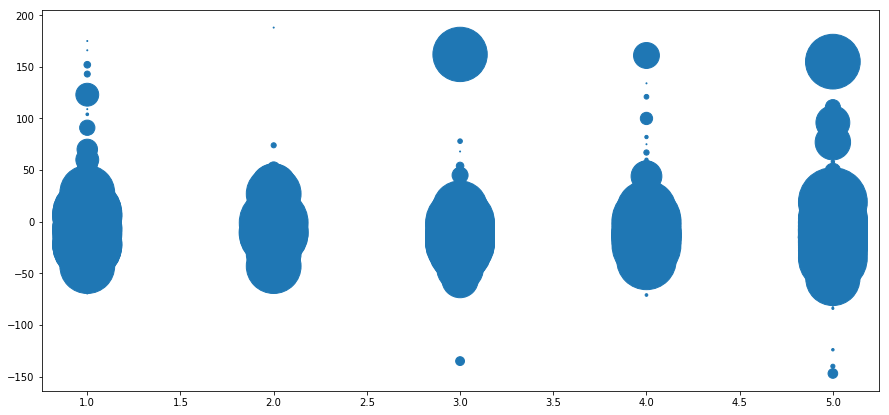

In [39]:
#data.plot(x='score', y='delay', kind='scatter')
plt.figure(figsize=(15, 7))

score_dummies = pd.get_dummies(data['score'])
frequency_data = pd.concat([data[['delay']], score_dummies], axis=1)
frequencies = frequency_data.groupby(['delay']).agg(['sum'])

sizes = [[f for f in frequencies.values[index]] for index in range(len(frequencies))]
functools.reduce(operator.iconcat, sizes, [])

plt.scatter(x=data['score'], y=data['delay'], s=sizes)
plt.show()

## Correlação

In [42]:
data.corr()['delay']['score']

-0.24720427989772584